In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.1.0+cu121'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

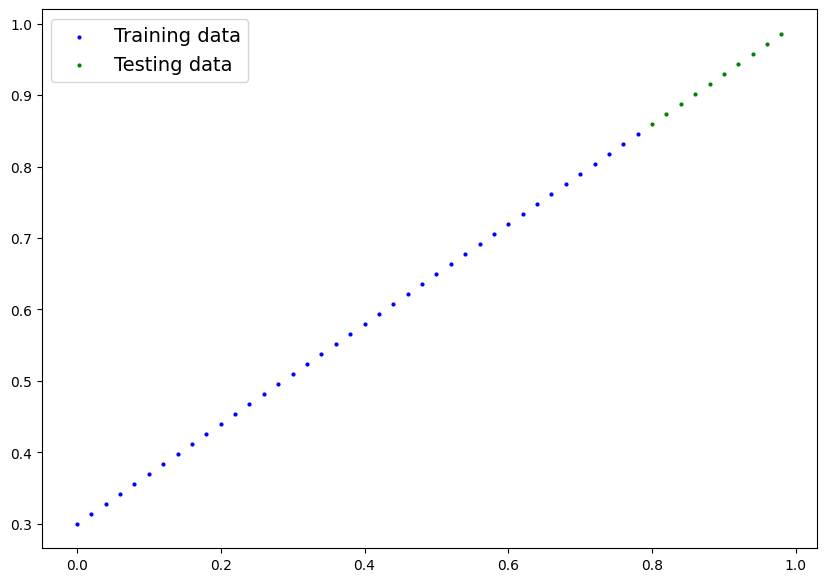

In [4]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

plot_prediction()

In [5]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [6]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()), model_0.state_dict()


([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [7]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

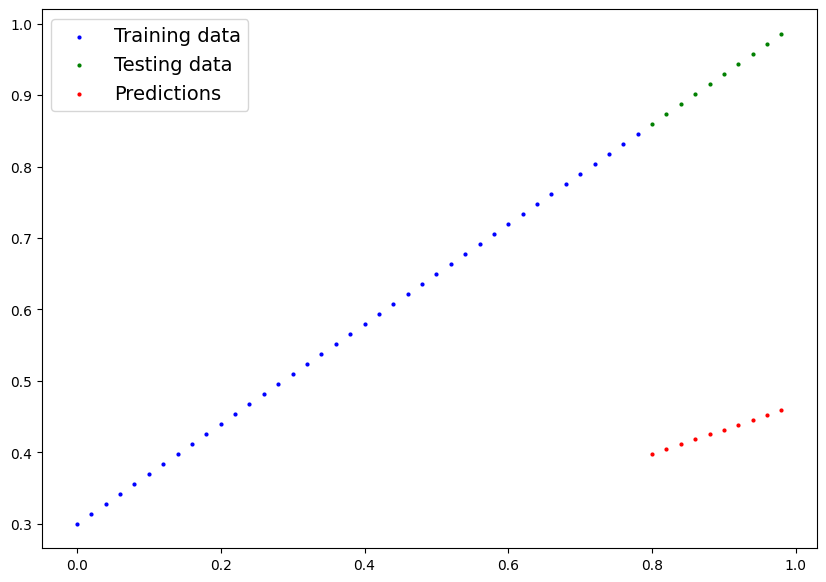

In [8]:
plot_prediction(predictions = y_preds)

In [9]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(),
                        lr=0.01)

In [10]:
torch.manual_seed(42)

epochs = 200
epoch_count = []
train_loss_values = []
test_loss_values = []

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0.forward(X_train)

  loss = loss_fn(y_pred, y_train)
  #print(f'Loss:{loss}')

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}')

    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test_loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test_loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test_loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test_loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test_loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test_loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

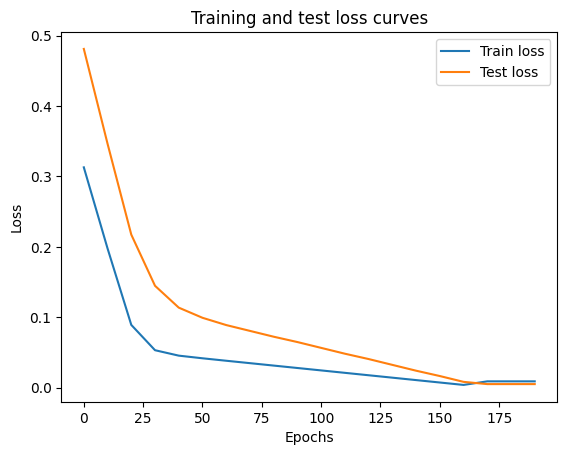

In [11]:
plt.plot(epoch_count, torch.tensor(train_loss_values).numpy(), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [12]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = ' 01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/ 01_pytorch_workflow_model_0.pth


In [13]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

\va sezione

In [14]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds=loaded_model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device: {device}')

using device: cuda


In [17]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y= weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
train_split= int (0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

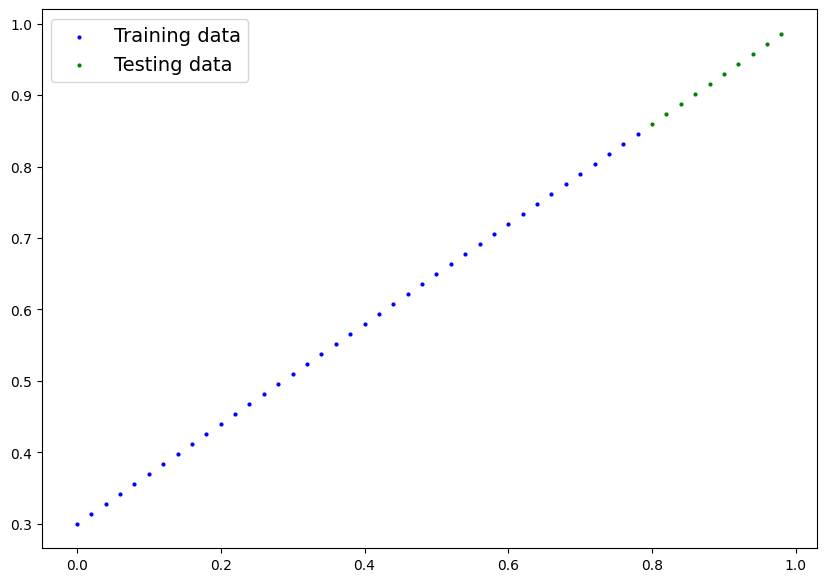

In [47]:
plot_prediction(X_train, y_train, X_test, y_test)

In [48]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1)
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
next(model_1.parameters()).device

device(type='cpu')

In [50]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [54]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [56]:
torch.manual_seed(42)
epochs = 200

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')


Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.001264503574930

In [57]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [58]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds



tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

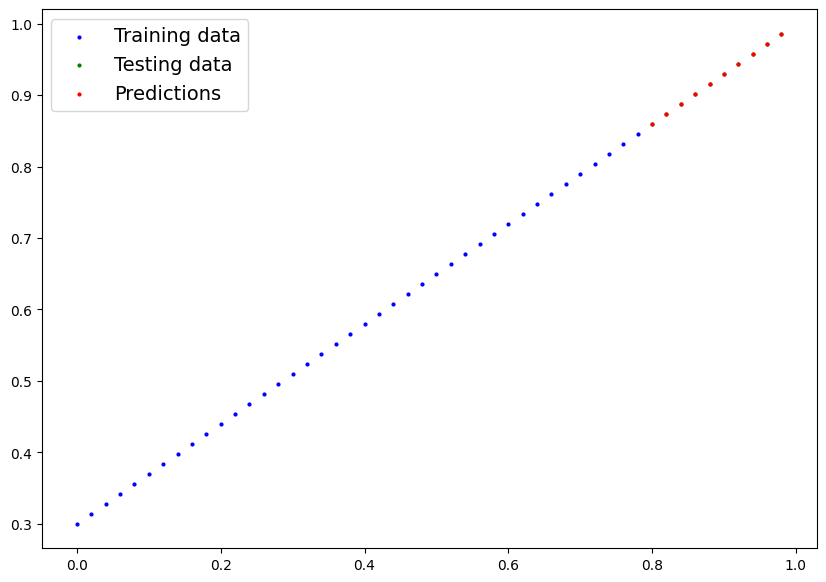

In [60]:
plot_prediction(predictions=y_preds.cpu())

In [62]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(MODEL_SAVE_PATH)

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)



models/01_pytorch_workflow_model_1.pth
Saving model to: models/01_pytorch_workflow_model_1.pth


In [63]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [64]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [65]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [67]:
loaded_model_1.eval()
with torch.inference_mode():
  y_loaded= loaded_model_1(X_test)

y_loaded == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')